In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [57]:
# Installing the package for building the model

!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163337 sha256=7701a68c1263420910d85ab9f18c30524b32657232410f1ac5b0082386d26016
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [58]:
# Importing the necessary libraries


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud
from surprise import SVD, Reader, Dataset
from surprise.model_selection import cross_validate


In [3]:
# Loading the data set

amazon_data=pd.read_csv("/content/gdrive/My Drive/amazon.csv")

### EXPLORATORY ANALYSIS OF THE AMAZON DATA



In [4]:
amazon_data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,$399,"$1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,$199,$349,43%,4,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,$199,"$1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,$329,$699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,$154,$399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [5]:
# Getting general information of the data set

amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [6]:
# Checking for the total number missing values

amazon_data.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [7]:
# Converting the rating from object to numeric

amazon_data['rating']= pd.to_numeric(amazon_data['rating'], errors='coerce')

In [8]:
# Confirming the data type of the rating column

amazon_data['rating'].dtype

dtype('float64')

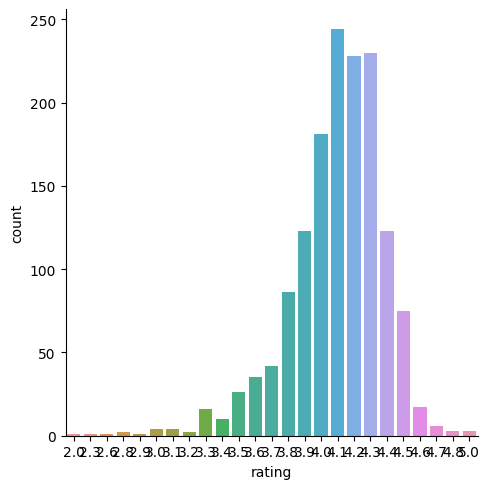

In [9]:
# A simple visualization of the product rating

sns.catplot(kind = 'count',
                data = amazon_data,
                x    = 'rating')

In [10]:
# Grouping the rating mean of the product by the category

amazon_data.groupby('category')['rating'].mean().head()

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                3.80
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters               4.15
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets       3.50
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones    3.60
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers       4.05
Name: rating, dtype: float64

In [11]:
# Replacing the missing values in the rating_count column with '0'

amazon_data['rating_count'] = amazon_data['rating_count'].fillna(0)

In [12]:
# Getting general information of the data set

amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   object 
 4   actual_price         1465 non-null   object 
 5   discount_percentage  1465 non-null   object 
 6   rating               1464 non-null   float64
 7   rating_count         1465 non-null   object 
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [13]:
# Replacing the missing values in the rating column with '0'

amazon_data['rating'] = amazon_data['rating'].fillna(0)

In [14]:
# Checking for the total number missing values

amazon_data.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [15]:
# Converting the rating_count from object to numeric

amazon_data['rating_count']= pd.to_numeric(amazon_data['rating_count'], errors='coerce')

In [16]:
# Grouping the rating mean of the product by the category

amazon_data.groupby('category')['rating'].mean().head()

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                3.80
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters               4.15
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets       3.50
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones    3.60
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers       4.05
Name: rating, dtype: float64

In [17]:
# Grouping the rating of the product by the category

amazon_data.groupby('category')['rating'].count().sort_values(ascending=False).head()

category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables    233
Electronics|WearableTechnology|SmartWatches                                           76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                  68
Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                         63
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                          52
Name: rating, dtype: int64

In [18]:
# Grouping the rating_count of the product by the category

amazon_data.groupby('category')['rating_count'].count().sort_values(ascending=False).head()

category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables                     61
Electronics|HomeTheater,TV&Video|Accessories|RemoteControls                                           38
Home&Kitchen|Heating,Cooling&AirQuality|RoomHeaters|FanHeaters                                        17
Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cleaning&Ironing|Irons,Steamers&Accessories|LintShavers    14
Home&Kitchen|Heating,Cooling&AirQuality|RoomHeaters|ElectricHeaters                                   13
Name: rating_count, dtype: int64

In [19]:
# Grouping the ratings of the product by the product id

amazon_data.groupby('product_id')['rating'].count().sort_values(ascending=False).head()

product_id
B077Z65HSD    3
B09KLVMZ3B    3
B098NS6PVG    3
B083342NKJ    3
B082T6V3DT    3
Name: rating, dtype: int64

In [20]:
# Dropping unnecessary coloumns in the data set

amazon_data.drop(amazon_data[['about_product','img_link','product_link']],axis='columns',inplace=True)

In [21]:
amazon_data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,user_id,user_name,review_id,review_title,review_content
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,$399,"$1,099",64%,4.2,NaN,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,$199,$349,43%,4.0,NaN,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,$199,"$1,899",90%,3.9,NaN,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a..."
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,$329,$699,53%,4.2,NaN,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou..."
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,$154,$399,61%,4.2,NaN,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th..."


### SOME VISUALIZATION OF THE AMAZON PRODUCT ACCESSORIES DATA


<Axes: >

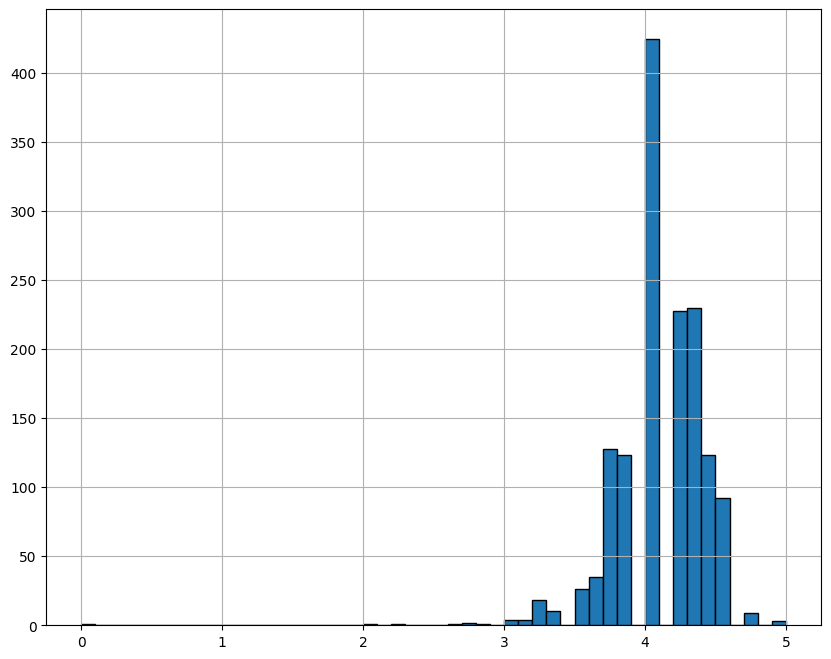

In [22]:
# Using histogram plot to get the distribution of the products ratings

plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True
amazon_data['rating'].hist(bins=50)

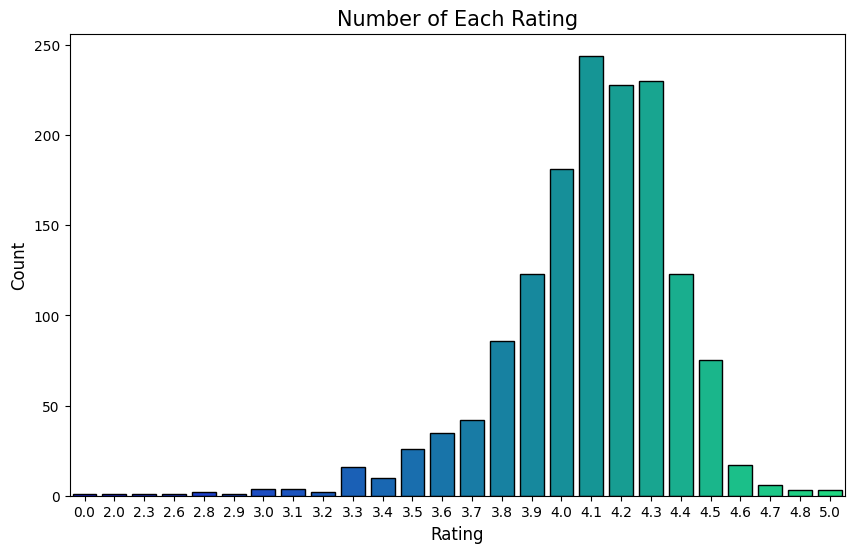

In [23]:
#Using Seaborn countplot to know the count of each rating

plt.figure(figsize=(10,6))
sns.countplot(x='rating', data=amazon_data, palette='winter')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Number of Each Rating', fontsize=15)
plt.show()


<Axes: >

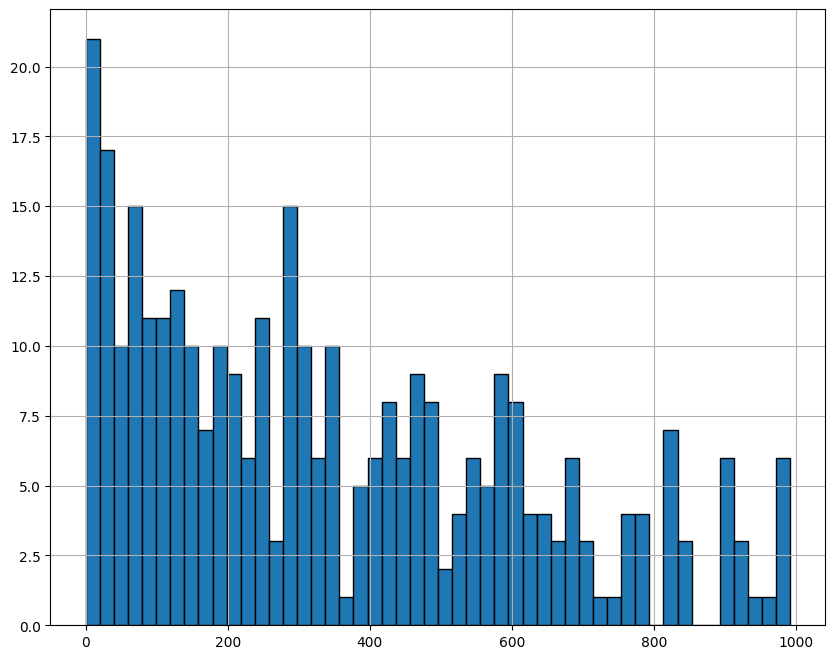

In [24]:
# Using histogram plot to know the distribution of the rating_count

plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True
amazon_data['rating_count'].hist(bins=50)

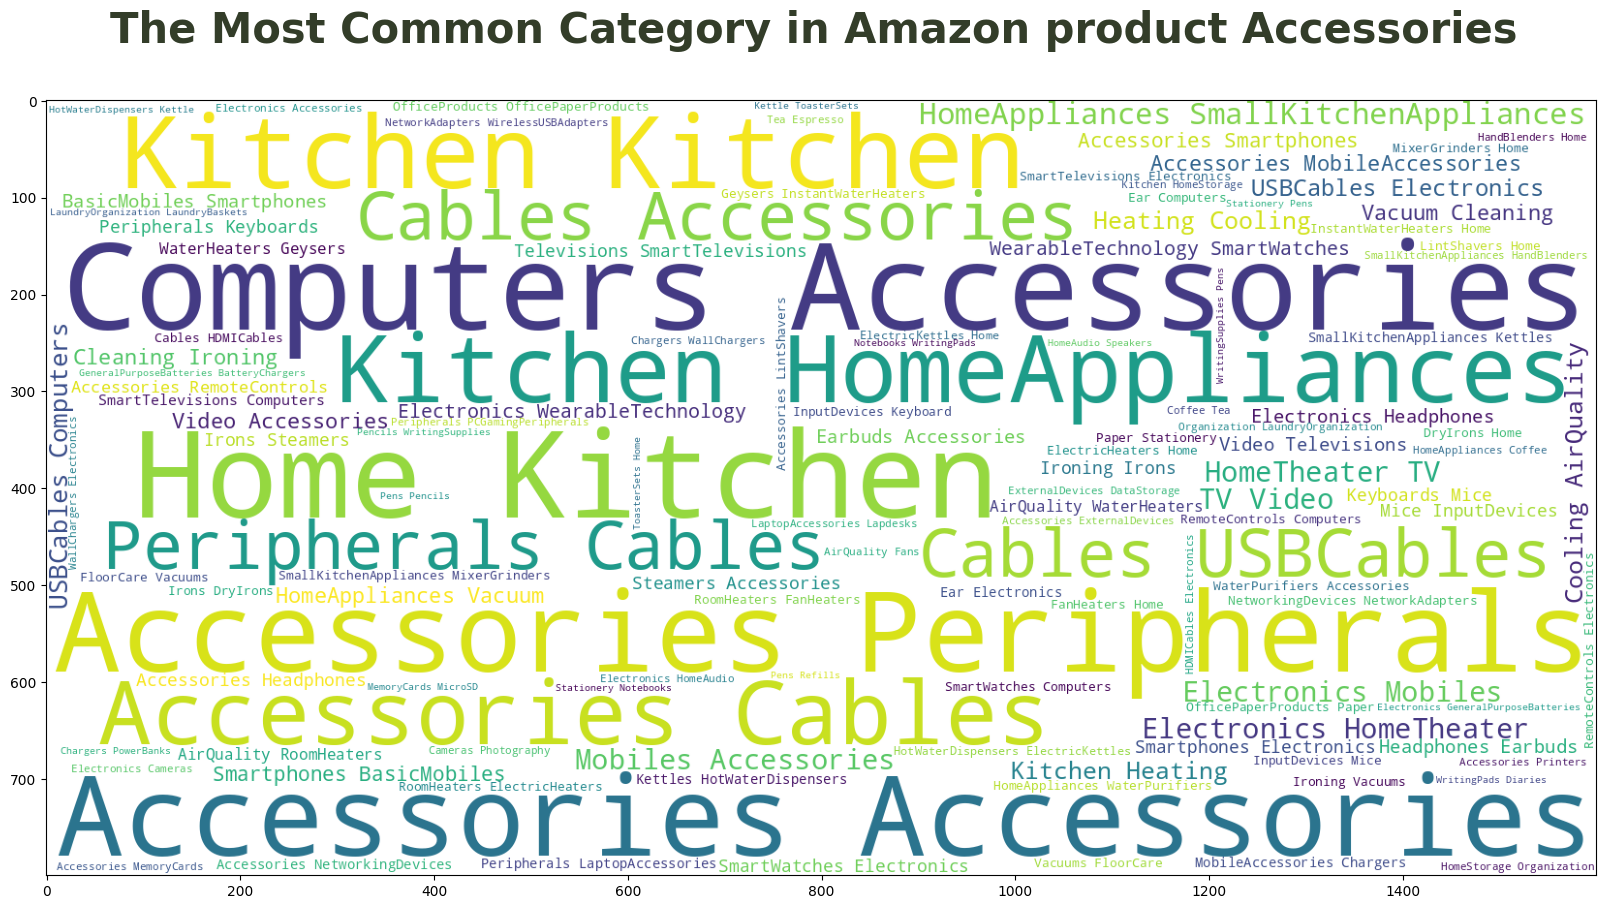

In [25]:
#Using word cloud to know the most common category in the Amazon product accessories

plt.figure(figsize=(20,20))
plt.title('The Most Common Category in Amazon product Accessories \n', fontsize=30, weight=600, color='#333d29')
wc = WordCloud(max_words=1000, min_font_size=10,
                height=800,width=1600,background_color="white").generate(' '.join(amazon_data['category']))

plt.imshow(wc)

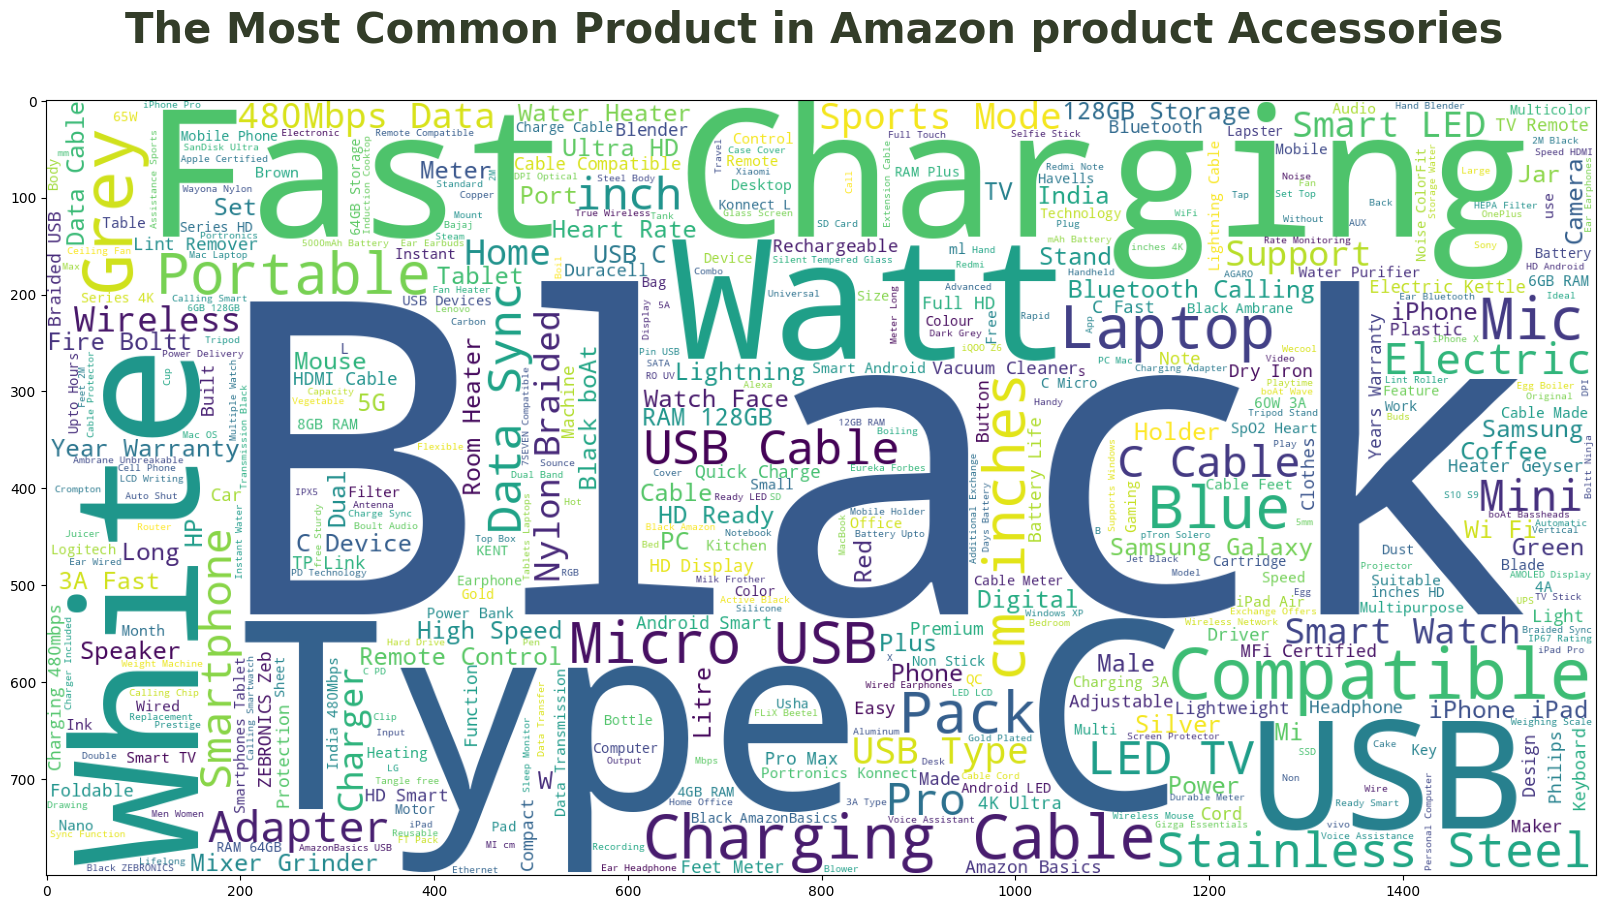

In [26]:
# Using word cloud to know the most common product in Amazon product accessories

plt.figure(figsize=(20,20))
plt.title('The Most Common Product in Amazon product Accessories \n', fontsize=30, weight=600, color='#333d29')
wc = WordCloud(max_words=1000, min_font_size=10,
                height=800,width=1600,background_color="white").generate(' '.join(amazon_data['product_name']))

plt.imshow(wc)

In [27]:
# Grouping the rating by the product ids

amazon_data.groupby('product_id')['rating'].mean().head()

product_id
B002PD61Y4    4.1
B002SZEOLG    4.2
B003B00484    4.3
B003L62T7W    4.3
B004IO5BMQ    4.5
Name: rating, dtype: float64

In [28]:
# Getting the number of unique product ids

amazon_data['product_id'].nunique()

1351

Text(0, 0.5, 'Count of products')

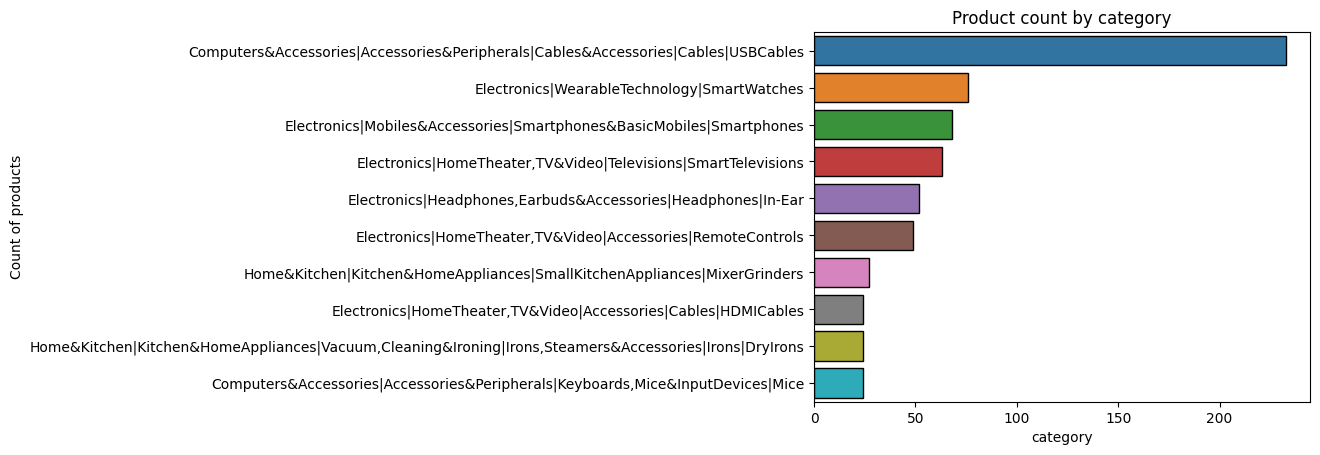

In [29]:
#Top 10 barplot of categories
order = amazon_data['category'].value_counts()[:10].index
sns.countplot(y='category', data=amazon_data, order=order)
plt.title("Product count by category")
plt.xlabel("category")
plt.ylabel("Count of products")

In [30]:
# Dropping unnecessary columns from the data set

amazon_data.drop(amazon_data[['product_name','category','discounted_price','actual_price','discount_percentage','rating_count','user_name','review_id','review_title','review_content']],axis='columns',inplace=True)

df =amazon_data.copy()

### EXPLORATORY ANALYSIS OF AMAZON DATA COPY

In [31]:
df.head()

,product_id,rating,user_id
0,B07JW9H4J1,4.2,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB..."
1,B098NS6PVG,4.0,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX..."
2,B096MSW6CT,3.9,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ..."
3,B08HDJ86NZ,4.2,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S..."
4,B08CF3B7N1,4.2,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH..."


In [32]:
df.shape

(1465, 3)

In [33]:
# Checking for the general information of the data set

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product_id  1465 non-null   object 
 1   rating      1465 non-null   float64
 2   user_id     1465 non-null   object 
dtypes: float64(1), object(2)
memory usage: 34.5+ KB


In [34]:
# Checking for missing values

df.isnull().sum()

product_id    0
rating        0
user_id       0
dtype: int64

In [35]:
# Summary statistics of 'rating' variable and provide observations
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,1465.0,4.093788,0.310598,0.0,4.0,4.1,4.3,5.0


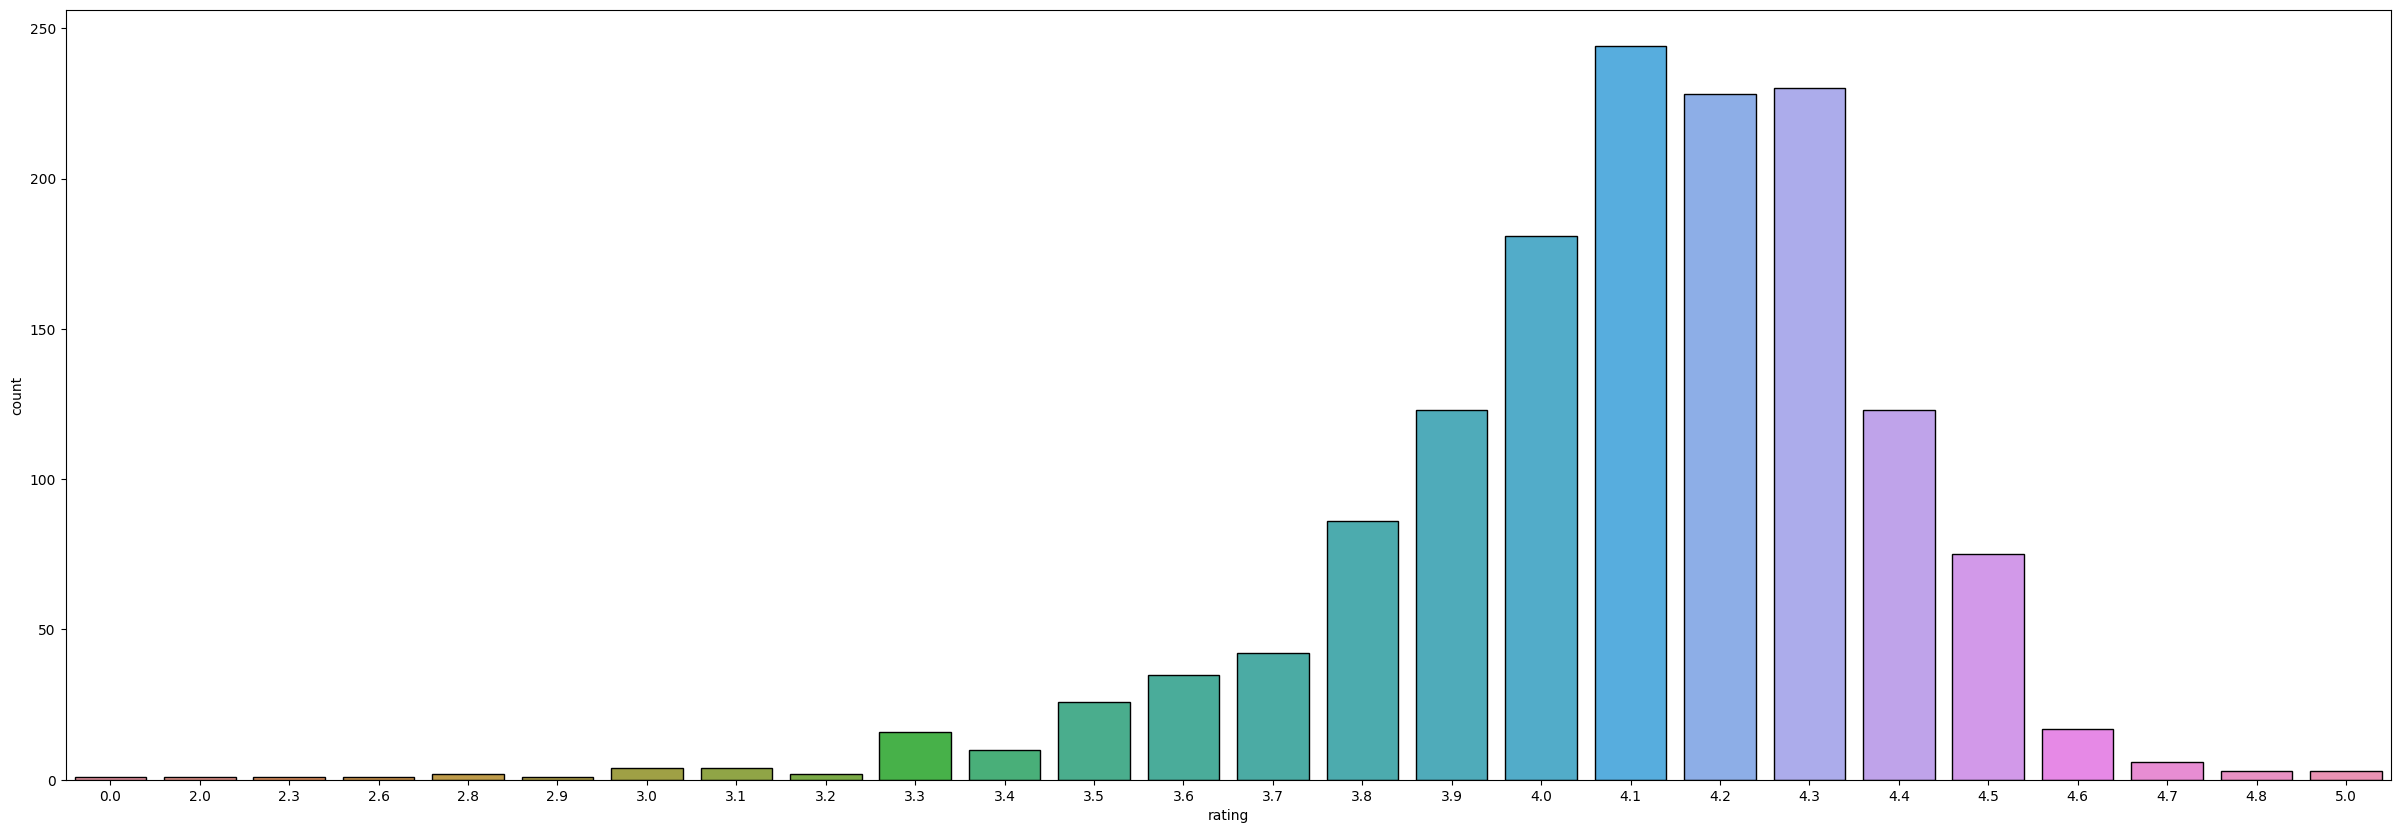

In [36]:
# Create the bar plot and provide observations
plt.figure(figsize=(30,10))
sns.countplot(x= 'rating',
            data = df)
# Show the plot
plt.show()

In [37]:
df['rating'].value_counts()

4.1    244
4.3    230
4.2    228
4.0    181
3.9    123
4.4    123
3.8     86
4.5     75
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.0      4
3.1      4
5.0      3
4.8      3
3.2      2
2.8      2
2.3      1
0.0      1
2.0      1
2.6      1
2.9      1
Name: rating, dtype: int64

In [38]:
# Number of total rows in the data and number of unique user id and product id in the data
df_uniques = pd.DataFrame(columns=['Total entries', 'Unique users', 'Unique products'])

df_uniques.loc[0] = [len(df), df['user_id'].nunique(), df['product_id'].nunique()]

df_uniques.style.hide_index()

<ipython-input-38-a5bc7711a3ab>:6: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  df_uniques.style.hide_index()


Total entries,Unique users,Unique products
1465,1194,1351


In [39]:
# Top 10 users based on the number of ratings

# Retrieve the top 10 + reshape the dataframe
df_top10_users_ratings = df['user_id'].value_counts().head(10).to_frame('counts')

# Reset to a standalone index (1 to 10)
df_top10_users_ratings.reset_index(inplace=True)
df_top10_users_ratings.index = df_top10_users_ratings.index + 1

# Rename the columns
df_top10_users_ratings.columns = ['user_id', 'counts']

# Display format function
def highlight_cols(x):

    # copy df to new - original data is not changed
    tmp = x.copy()

    tmp[:] = 'font-weight: bold'

    return tmp

# Output the dataframe, with user_id highlighted in bold
display(df_top10_users_ratings.style.apply(highlight_cols, subset='user_id', axis = 1))

,user_id,counts
1,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPYWP2OUPEYNPQ,AEBWA5I4QFCA3P3OBEPMELBGN4GQ,AHMGAC6QM62UXNEOCZIHLHSXPP2Q,AFHROSCGIXUPV3FYQ7H5QOD46Q7Q,AEAMIR3CMSA32IDEINSJKHRNANTA,AF355FTXYAKFH5NYPRTE7SL3WO3Q,AG5DWPD54QGSLWJ6QUFERLPNAX4Q",10
2,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ",8
3,"AGAELRYPMTG5SADZPDYB343EASAA,AGFN4JODOM2NTFCJQOHDBQLVDJTQ,AG7EZVSAXIVGMNDLSA55K7URQCJA,AGGF75HIEMB67OU7J3RDALBSUKQQ,AHY5CI4SU6JBYPIZ5RLAGO6W3F4A,AE4KODNBVTDCZWZO4HZM4GTRERPA,AH6HFHSYOY2OHMODD7244DHG7FUQ,AHRW5JERWYAJCZO65PDKZSOEPR6Q",8
4,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5SGCUQBP7YSCA,AH725ST5NW2Y4JZPKUNTIJCUK2BA,AHV3TXIFCJPMS4D5JATCEUR266MQ,AGWIGDEMFIIUAOXYY2QATNBSUGHA,AFSTSLQUV4EVEXWKBOLEFHL2H5YQ,AGAKDNBHY2FKX7I4ACRGILU7QL7A,AFNWJUWJRHCC6HN52KMG5AKZY37Q",7
5,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBXNGXZJT525AQ,AHONIZU3ICIEHQIGQ6R2VFRSBXOQ,AFPHD2CRPDZMWMBL7WXRSVYWS5JA,AEZ346GX3HJ4O4XNRPHCNHXQURMQ,AEPSWFPNECKO34PUC7I56ITGXR6Q,AHWVEHR5DYLVFTO2KF3IZATFQSWQ,AH4QT33M55677I7ISQOAKEQWACYQ",7
6,"AHWRZWPCTG6ICA7WTNLNNZXWFI5Q,AF2AASVYVSROFD7FXA6EFDS6N2LA,AG6YHIDBTRF4SWXLDWRVMRS56AMQ,AHELRKIGSIPF5VMAGPCPAUJYKOLQ,AH7HRG7P5VGMMU4PN7CEDU74Y2AA,AGPO4HV54G5JLGEZYJJ7NC63V6BQ,AHIMX6EL6H3CLBEVJCWLIQHSAA3A,AEITUHHOUWUNZPQDSHA2ZWQGJUMQ",6
7,"AG44HJB2AMIVHAGQZ2WGWONERKCA,AHL2FABQV6XAHZN547DN662X5RWA,AHJE6QFY5XEOZJJWOIOHHIDFWWFQ,AEDMSJ2CEQZID62NXPKEQLMBG2LQ,AHF7ZBKNBLCLFHGJG5KXKPI7QVCQ,AGD2S7EXXSXHBCJHTXUAV6FLXAZA,AHZRUY7MR4SVM3HFJ2SZDGHZJ56A,AHEHKOZPPOVYL75KDU52PSBYDEFQ",6
8,"AHEVOQADJSSRX7DS325HSFLMP7VQ,AG7XYZRCSKX6G2OLO7DVZWIZ3PUQ,AE2THTCCQLBIUSWPF4CPXC6GGP7Q,AHUJZOV34DFEN55QQ5XOYKVKHV6Q,AELX4DI77ZHURZTDLYFU7XMP7R6Q,AE2ODWBBOBD2SITDDIEJ644OSRFQ,AFLW4WXYQ3G6HU5LBQORDDZO3FOQ,AGGRC2P6M43GDEWCAHGYAILCSKTQ",5
9,"AF477BP57JM7Z4JD4PYB2K33R6AQ,AGTDD34Y77OB36JNYQWQDN7MHECQ,AG7POKBSWQUO4VOYD4HDWYKMMJ4Q,AFZS6H2ZFJEJHRWIJ3IYL7V6KRPA,AHCYM2ECKI2MNOIDHDG4PT6IIN6A,AECZ4IP3TBM4EUG52BZAOQV3EKIA,AH6RQDXZYKAUPNBOYC4NAZERTFOQ,AFTVETL4HGH4KRUF4NXGJUEDPBAQ",5
10,"AF2IRSQZKMBGX44YDNUPYRHWXOZQ,AF6VSSXOI3Y4PZCNRJ3L27NCXPYA,AHQKC4MLLVOPBTKJFDBGTXFRKLYQ,AGX5ELLH3KJJ4CY2DJJOXDSOEI6Q,AGJ23TWSY6YFMAVSEAOAUEWO4QLQ,AFOHB4M2RWSUQ3SSZWPMD2FPH6PQ,AFVHKKOI25DAQSETPL7Z5W5SIVUA,AE55WJERHR4C7SEAIWX4JJHFSZBA",5


In [40]:
# Calculate the average rating for each product
average_rating = df.groupby('product_id').mean()['rating']

# Calculate the count of ratings for each product
aggregate_count = df.groupby('product_id').count()['rating']

# Create a dataframe with calculated average and count of ratings
df_averages_counts = pd.DataFrame({'avg_rating': average_rating, 'rating_count': aggregate_count})

# Sort the dataframe by average of ratings in the descending order
final_rating = df_averages_counts.sort_values(by=['avg_rating'],  ascending=False)

# See the first five records of the "final_rating" dataset
final_rating.head()

<ipython-input-40-b657732624cf>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_rating = df.groupby('product_id').mean()['rating']


,avg_rating,rating_count
product_id,,
B0BP7XLX48,5.0,1
B0BQRJ3C47,5.0,1
B09ZHCJDP1,5.0,1
B0BR4F878Q,4.8,1
B0B53DS4TF,4.8,1


### BUILDING THE RECOMMENDER SYSTEM

### Collaborative Recommender

in this section, we will use a technique called Collaborative Filtering to make better recommendations to Amazon customers.

Collaborative Filtering matches persons with similar interests and provides recommendations based on this matching. It is based on the idea that users similar to me can be used to predict how much I will like a particular product or service those users have used/experienced but I have not.

Surprise library is a Python scikit for building and analyzing recommender systems that deal with explicit rating data. Here we use the Surprise library that uses extremely powerful algorithms like Singular Value Decomposition (SVD) to minimise Root Mean Square Error (RMSE) that is measured by Kfold Cross Validation and give great recommendations.

SVD: Matrix Factorization Based Algorithm
Here we will use the famous SVD algorithm.

In [59]:

svd = SVD()
reader = Reader()
# Now we load the df dataset.

data = Dataset.load_from_df(df[['user_id', 'product_id', 'rating']], reader)
# Then we run 5-fold cross-validation and print the results.

cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.2598  0.2769  0.3009  0.2835  0.3831  0.3009  0.0432  
MAE (testset)     0.1954  0.1921  0.2070  0.2100  0.2303  0.2070  0.0135  
Fit time          0.02    0.02    0.02    0.02    0.02    0.02    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    


{'test_rmse': array([0.25983906, 0.27694528, 0.30087736, 0.28353883, 0.38305279]),
 'test_mae': array([0.19543954, 0.19214393, 0.20702032, 0.21002551, 0.23027239]),
 'fit_time': (0.021377086639404297,
  0.0214691162109375,
  0.021516799926757812,
  0.021057844161987305,
  0.021292924880981445),
 'test_time': (0.0019490718841552734,
  0.002286195755004883,
  0.001661062240600586,
  0.0015826225280761719,
  0.0016007423400878906)}

In [60]:
# We get a mean Root Mean Sqaure Error of 0.29 approx which is good enough for our case. Let us now train on our dataset and arrive at predictions.

trainset = data.build_full_trainset()
# We train the algorithm on the trainset.

svd.fit(trainset)

In [61]:
# Let us pick the user with userId of 'AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPYWP2OUPEYNPQ,AEBWA5I4QFCA3P3OBEPMELBGN4GQ,AHMGAC6QM62UXNEOCZIHLHSXPP2Q,AFHROSCGIXUPV3FYQ7H5QOD46Q7Q,AEAMIR3CMSA32IDEINSJKHRNANTA,AF355FTXYAKFH5NYPRTE7SL3WO3Q,AG5DWPD54QGSLWJ6QUFERLPNAX4Q' and check the ratings she/he has given so far to different products.

df[df['user_id'] == 'AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPYWP2OUPEYNPQ,AEBWA5I4QFCA3P3OBEPMELBGN4GQ,AHMGAC6QM62UXNEOCZIHLHSXPP2Q,AFHROSCGIXUPV3FYQ7H5QOD46Q7Q,AEAMIR3CMSA32IDEINSJKHRNANTA,AF355FTXYAKFH5NYPRTE7SL3WO3Q,AG5DWPD54QGSLWJ6QUFERLPNAX4Q']

,product_id,rating,user_id
23,B09NHVCHS9,4.0,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY..."
44,B09NJN8L25,4.0,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY..."
81,B09NKZXMWJ,4.0,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY..."
176,B0B3N8VG24,4.0,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY..."
178,B0B3MQXNFB,4.0,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY..."
196,B08P9RYPLR,4.0,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY..."
253,B08N1WL9XW,4.0,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY..."
478,B09NHVCHS9,4.0,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY..."
486,B09NL4DJ2Z,4.0,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY..."
727,B09NHVCHS9,4.0,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY..."


In [62]:
# As an example, we use the algorithm to predict the score that might be given to the productId of 'B09NHVCHS9' by this specific userId.

svd.predict(uid='AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPYWP2OUPEYNPQ,AEBWA5I4QFCA3P3OBEPMELBGN4GQ,AHMGAC6QM62UXNEOCZIHLHSXPP2Q,AFHROSCGIXUPV3FYQ7H5QOD46Q7Q,AEAMIR3CMSA32IDEINSJKHRNANTA,AF355FTXYAKFH5NYPRTE7SL3WO3Q,AG5DWPD54QGSLWJ6QUFERLPNAX4Q', iid='B09NHVCHS9', r_ui=None)

Prediction(uid='AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPYWP2OUPEYNPQ,AEBWA5I4QFCA3P3OBEPMELBGN4GQ,AHMGAC6QM62UXNEOCZIHLHSXPP2Q,AFHROSCGIXUPV3FYQ7H5QOD46Q7Q,AEAMIR3CMSA32IDEINSJKHRNANTA,AF355FTXYAKFH5NYPRTE7SL3WO3Q,AG5DWPD54QGSLWJ6QUFERLPNAX4Q', iid='B09NHVCHS9', r_ui=None, est=3.963921447176684, details={'was_impossible': False})

In [64]:
svd.predict(uid='AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPYWP2OUPEYNPQ,AEBWA5I4QFCA3P3OBEPMELBGN4GQ,AHMGAC6QM62UXNEOCZIHLHSXPP2Q,AFHROSCGIXUPV3FYQ7H5QOD46Q7Q,AEAMIR3CMSA32IDEINSJKHRNANTA,AF355FTXYAKFH5NYPRTE7SL3WO3Q,AG5DWPD54QGSLWJ6QUFERLPNAX4Q', iid='B09NHVCHS9', r_ui=None).est

3.963921447176684

In [65]:
# Example 2

svd.predict(uid='A17HMM1M7T9PJ1', iid='0970407998', r_ui=None)

Prediction(uid='A17HMM1M7T9PJ1', iid='0970407998', r_ui=None, est=4.093788395904436, details={'was_impossible': False})

In [66]:
svd.predict(uid='A17HMM1M7T9PJ1', iid='0970407998', r_ui=None).est

4.093788395904436

In [84]:
## Hybrid Recommender
# In this section, we try to build a hybrid recommender that combines corrwith() method which computes the Pearson correlation coefficients with collaborative filtering


df_users=df.groupby('user_id').filter(lambda x: x['rating'].count()<=50)


In [100]:
df_users.head()

,product_id,rating,user_id
0,B07JW9H4J1,4.2,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB..."
1,B098NS6PVG,4.0,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX..."
2,B096MSW6CT,3.9,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ..."
3,B08HDJ86NZ,4.2,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S..."
4,B08CF3B7N1,4.2,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH..."


In [86]:
df_users.shape

(1465, 3)

In [87]:
matrix=pd.pivot_table(data=df_users, values='rating', index='user_id',columns='product_id')

In [88]:
matrix.head()

product_id,B002PD61Y4,B002SZEOLG,B003B00484,B003L62T7W,B004IO5BMQ,B005FYNT3G,B005LJQMCK,B005LJQMZC,B006LW0WDQ,B0073QGKAS,...,B0BP18W8TM,B0BP7XLX48,B0BP89YBC1,B0BPBG712X,B0BPBXNQQT,B0BPCJM7TB,B0BPJBTB3F,B0BQ3K23Y1,B0BQRJ3C47,B0BR4F878Q
user_id,,,,,,,,,,,,,,,,,,,,,
"AE22Y3KIS7SE6LI3HE2VS6WWPU4Q,AHWEYO2IJ5I5GDWZAHJK6NGYHFMA,AGYURQ3476BNT4D2O46THXEUY3SA,AFPMBSBIEX45OQ6UCQWPDG55GWLQ,AGWJU3WUQBDQYPSYAJSR3AKBLCOA,AEOVUNFCIFV223O536GVW5JHZKOA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"AE23RS3W7GZO7LHYKJU6KSKVM4MQ,AEQUNEY6GQOTEGUMS6KRUEYNXJSQ,AGYPIE5BICV44WEEEPJVEFQOCJSQ,AFR7CEQKWZE53IHHOWBIPAMYKL4Q,AGBV7FBP4SEITF6UKRFKTV7O32IA,AHQVOY54QKPIQZIJ57JKCGQPVV3Q,AEMCVRRD3XQRGFHC2VFCXHJEMESQ,AFBWXU7DUWCIK5MRDCLBXWTWN7ZQ",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AE242TR3GQ6TYC6W4SJ5UYYKBTYQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"AE27UOZENYSWCQVQRRUQIV2ZM7VA,AGMYSLV6NNOAYES25JDTJPCZY47A,AFHS33MWRQGSS64EETZJGCBWXXXA,AHYXZVXUY3QTBP7IBFIUBSZVH2XQ,AH2SHWYEWDAK6A5Y2ZBEMZ2KIG3A,AEYMOGP2CYRKYZ7TIDNLGR5QPZ4Q,AGPGDCCXPI3EACMNJKBCNT57DVFA,AFPBMRYRSMD3PP3CBKLFF7EKOCXA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"AE2JTMRKTUOIVIZWS2WDGTMNTU4Q,AF4QXCB32VC2DVE7O3DGFNQVFFNQ,AGAFYHMPFGVPR3MOS4QAZLAWPW3A,AGNNWLEF6V57TKIFJM7SWHNFAIQQ,AFVIPOPKMOCVCX3CMXUJHMWDIMGA,AH6MFUU725GG4KA3XTALSTU2ILHA,AGQYTSKE2UBYARZYRBADQMX6BJPQ,AG7F66F724JZ2HIJQY7NOU5M5D2Q",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### HYBRID BASED FILTERING RECOMMENDER SYSTEM

In this section, we try to build a hybrid recommender that combines corrwith() method which computes the Pearson correlation coefficients with collaborative filtering. This is how it works:

Input: User ID and Product ID

Output: Similar products sorted on the basis of expected ratings by a particular user.

In [103]:
# Function that takes in productId and useId as input and outputs up to 5 most similar products.
def hybrid_recommendations(userId, productId):

    # Get the Id of the top five products that are correlated with the ProductId chosen by the user.
    top_five=matrix.corrwith(matrix[productId]).sort_values(ascending=False).head()

    # Predict the ratings the user might give to these top 5 most correlated products.
    est_rating=[]
    for x in list(top_five.index):
        if str(top_five[x])!='nan':
            est_rating.append(svd.predict(userId, iid=x, r_ui=None).est)

    return pd.DataFrame({'productId':list(top_five.index)[:len(est_rating)], 'estimated_rating':est_rating}).sort_values(by='estimated_rating', ascending=False).reset_index(drop=True)


### CONCLUSION

Collaborative Filtering: We used the powerful Surprise Library to build a collaborative filter based on single value decomposition. The RMSE obtained was about 0.29 and the engine predicted estimated ratings for a given user and product.

Hybrid Engine: We combined corrwith() method which computed the Pearson correlation coefficients with collaborative filtering. Our hybrid recommender took useId and productId as input and suggested up to 5 products that were similar to the input productId based on the estimated ratings that was internally calculated for the input userId. This Hybrid System took advantage of both Pearson method and Collaborative filtering and therefore made reliable predictions.